In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [13]:
def plot_decision_boundary(model, X, y):
    
    # define the axis boundaries of the plot
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    
    # create a meshgrid from the axis boundaries
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # generate x values for making predictions
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    
    # make predictions
    y_pred = model.predict(x_in)
    
    # logic to make the function re-usable across multi-class classification
    if len(y_pred[0]) > 1:
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [4]:
samples = 2000
X, y = make_circles(samples, noise=0.04, random_state=42)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
print(f'X_train.shape {X_train.shape} y_train.shape {y_train.shape}')
print(f'X_test.shape {X_test.shape} y_test.shape {y_test.shape}')

X_train.shape (1500, 2) y_train.shape (1500,)
X_test.shape (500, 2) y_test.shape (500,)


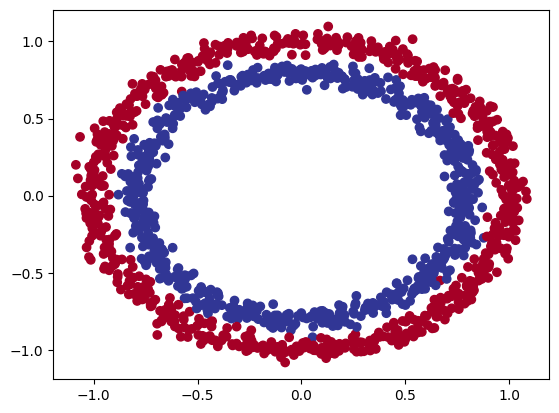

In [8]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu)
plt.show()

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
              metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=15)

Epoch 1/15


2023-01-18 22:55:01.532932: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-18 22:55:02.143573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 3s 7ms/step - loss: 0.6819 - accuracy: 0.5287
Epoch 2/15
47/47 [==============================] - 0s 6ms/step - loss: 0.6309 - accuracy: 0.6733
Epoch 3/15
47/47 [==============================] - 0s 6ms/step - loss: 0.5430 - accuracy: 0.8340
Epoch 4/15
47/47 [==============================] - 0s 6ms/step - loss: 0.4300 - accuracy: 0.9187
Epoch 5/15
47/47 [==============================] - 0s 6ms/step - loss: 0.3114 - accuracy: 0.9607
Epoch 6/15
47/47 [==============================] - 0s 6ms/step - loss: 0.2362 - accuracy: 0.9733
Epoch 7/15
47/47 [==============================] - 0s 6ms/step - loss: 0.1894 - accuracy: 0.9727
Epoch 8/15
47/47 [==============================] - 0s 6ms/step - loss: 0.1480 - accuracy: 0.9933
Epoch 9/15
47/47 [==============================] - 0s 6ms/step - loss: 0.1268 - accuracy: 0.9920
Epoch 10/15
47/47 [==============================] - 0s 6ms/step - loss: 0.1108 - accuracy: 0.9873
Epoch 11/15
47/47 [===========

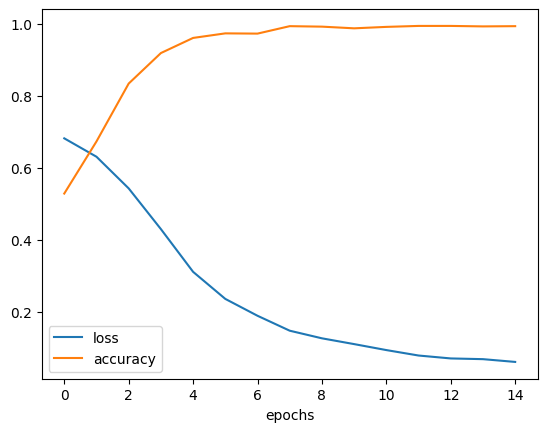

In [12]:
pd.DataFrame(history.history).plot(xlabel='epochs')
plt.show()

In [14]:
model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 6ms/step - loss: 0.0650 - accuracy: 0.9900


2023-01-18 22:57:50.780079: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[0.06503259390592575, 0.9900000691413879]

103/313 [========>.....................] - ETA: 0s

2023-01-18 23:00:11.147785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step


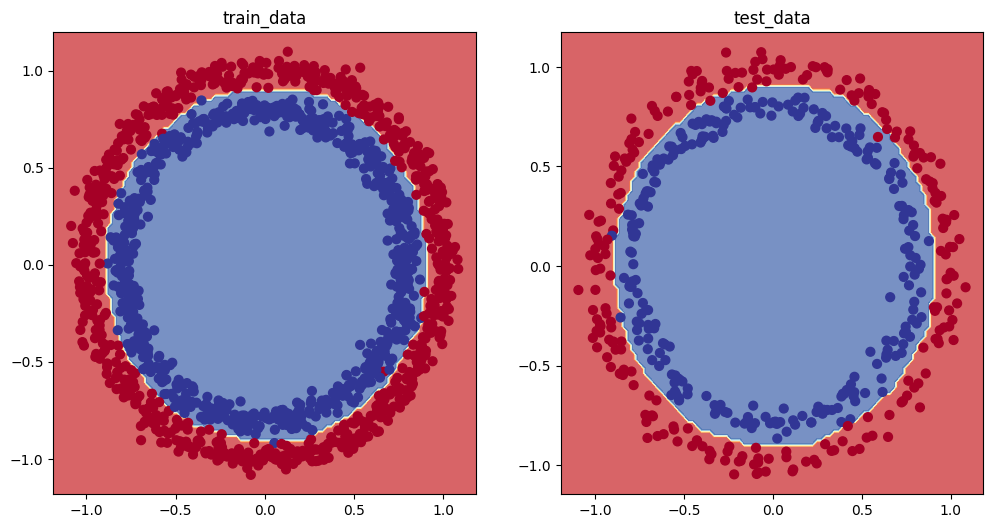

In [15]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('train_data')
plot_decision_boundary(model, X_train, y_train)

plt.subplot(1,2,2)
plt.title('test_data')
plot_decision_boundary(model, X_test, y_test)

plt.show()

In [17]:
from sklearn.metrics import confusion_matrix

# make predictions
y_preds = model.predict(X_test)

# create the confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

16/16 [==============================] - 0s 2ms/step


array([[238,   3],
       [  2, 257]])